In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding if using 'categorical_crossentropy' loss
# For 'sparse_categorical_crossentropy', integer labels are fine.
# We'll stick with integer labels for simplicity here.

In [3]:
model = keras.Sequential([
    # Input Layer: Number of features in your data (4 for Iris)
    layers.Input(shape=(X_train_scaled.shape[1],)),

    # Hidden Layer 1: A Dense (fully connected) layer with ReLU activation
    layers.Dense(units=10, activation='relu', name='hidden_layer_1'),

    # Hidden Layer 2: Another Dense layer
    layers.Dense(units=5, activation='relu', name='hidden_layer_2'),

    # Output Layer: 3 units for 3 classes (Iris species)
    # Softmax for multi-class classification, outputs probabilities
    layers.Dense(units=len(np.unique(y_train)), activation='softmax', name='output_layer')
])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam', # Adam is a popular and effective optimizer
              loss='sparse_categorical_crossentropy', # Good for integer labels (0, 1, 2 for Iris)
              metrics=['accuracy']) # Metric to monitor during training

In [5]:
history = model.fit(X_train_scaled, y_train,
                    epochs=100, # Number of times to pass through the entire dataset
                    batch_size=16, # Number of samples per gradient update
                    validation_split=0.1, # Use 10% of training data for validation
                    verbose=1) # Show training progress

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3631 - loss: 1.0683 - val_accuracy: 0.4167 - val_loss: 1.1773
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3545 - loss: 1.0599 - val_accuracy: 0.4167 - val_loss: 1.1656
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4334 - loss: 1.0460 - val_accuracy: 0.5000 - val_loss: 1.1526
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3734 - loss: 1.0353 - val_accuracy: 0.5000 - val_loss: 1.1394
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3573 - loss: 1.0149 - val_accuracy: 0.5000 - val_loss: 1.1256
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3696 - loss: 0.9697 - val_accuracy: 0.5000 - val_loss: 1.1121
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3570 - loss: 0.9978 - val_accuracy: 0.5000 - val_loss: 1.0972
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3548 - loss: 0.9777 - val_accuracy: 0.5833 - val_loss: 

Test Loss: 0.1301
Test Accuracy: 0.9667


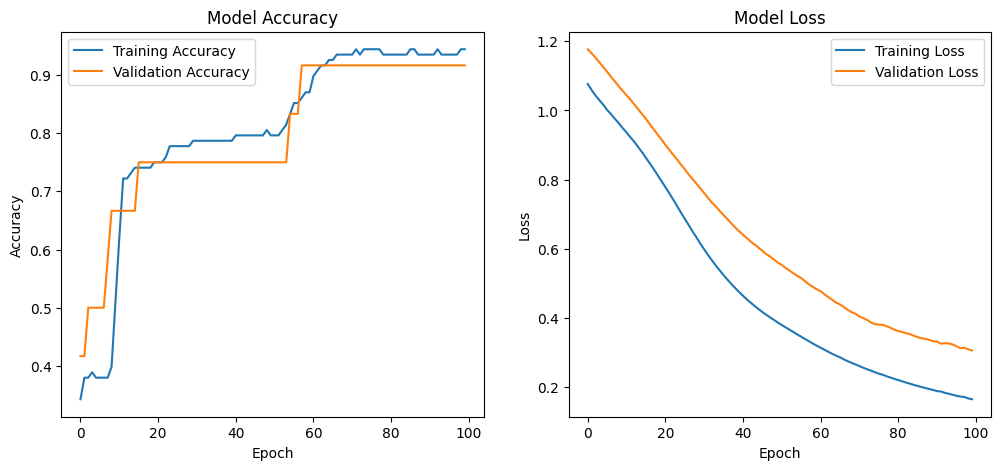

In [6]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Predict probabilities for a new data point (e.g., a single scaled flower)
new_flower_features = np.array([[5.1, 3.5, 1.4, 0.2]]) # Example features
new_flower_features_scaled = scaler.transform(new_flower_features)

predictions = model.predict(new_flower_features_scaled)
predicted_class = np.argmax(predictions) # Get the index of the highest probability

print(f"Probabilities: {predictions[0]}")
print(f"Predicted class index: {predicted_class}")
print(f"Predicted species: {iris.target_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Probabilities: [9.9258691e-01 7.3899422e-03 2.3202369e-05]
Predicted class index: 0
Predicted species: setosa
